<a href="https://colab.research.google.com/github/jjain0811/Plant-Disease-Detection-Using-Deep-Learning/blob/main/Plant_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import tensorflow as tf
from matplotlib.image import imread
import cv2

from sklearn.utils import class_weight, shuffle
import shutil
import random


In [ ]:
data_dir="/home/jj/Downloads/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

In [ ]:
train_dir=data_dir+'/train'

In [ ]:
valid_dir=data_dir+'/valid'

In [ ]:

(os.listdir(train_dir))

['Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Strawberry___Leaf_scorch',
 'Cherry_(including_sour)___healthy',
 'Tomato___healthy',
 'Grape___Black_rot',
 'Potato___Late_blight',
 'Tomato___Septoria_leaf_spot',
 'Apple___Cedar_apple_rust',
 'Tomato___Bacterial_spot',
 'Squash___Powdery_mildew',
 'Peach___Bacterial_spot',
 'Raspberry___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Grape___Esca_(Black_Measles)',
 'Cherry_(including_sour)___Powdery_mildew',
 'Potato___Early_blight',
 'Strawberry___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Apple___Apple_scab',
 'Blueberry___healthy',
 'Tomato___Early_blight',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Potato___healthy',
 'Soybean___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Peach___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Target_Spot',
 'Tomato___Leaf_Mold',
 'Grape___healthy',
 'Apple___Black_rot',
 'Pepper,_bell___healthy',
 'Apple_

In [ ]:
(os.listdir(train_dir+'/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)')[4])

'd6236498-7c4d-40cd-9f1b-476816ab3c85___FAM_L.Blight 3693.JPG'

(256, 256, 3)

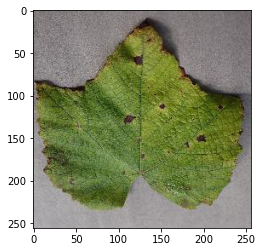

In [ ]:
img=train_dir+'/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'+'/d6236498-7c4d-40cd-9f1b-476816ab3c85___FAM_L.Blight 3693.JPG'
img=imread(img)
plt.imshow(img)
img.shape

In [ ]:
image_shape=(256,256,3)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
def my_preprocessing_func(img):
    image = np.array(img)
    return image / 255
from keras.preprocessing.image import ImageDataGenerator
# Data Agumentation has been applied to make the model more efficient and also to feed images of different orientation to the model
transform_set=ImageDataGenerator(rotation_range=10,
                                 rescale=1./255,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')


In [ ]:
training_set=transform_set.flow_from_directory(train_dir,
                                               target_size=img_shape[:2],
                                              color_mode='rgb',
                                              batch_size=256,
                                              shuffle=True)
validation_set=transform_set.flow_from_directory(valid_dir,
                                               target_size=img_shape[:2],
                                              color_mode='rgb',
                                              batch_size=256,
                                              shuffle=True)




Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D
from keras.layers import Activation,Flatten, Dropout
from keras.layers.normalization import BatchNormalization


In [ ]:
#Model is being initiated
model= Sequential()

#Making Dense Network
model.add(Conv2D(32, (3,3),input_shape=img_shape))
model.add(Activation('relu'))

#Function to make the algo run faster by making appropriate changes
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape=img_shape))
model.add(Activation('relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

#Model Flateening for having input
model.add(Flatten())

model.add(Dense(150))
model.add(Activation('relu'))

#Dropout is being used to reduce overfitting
model.add(Dropout(0.4))

model.add(Dense(38, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 254, 254, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 125, 125, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 125, 64)     

In [ ]:
validation_set.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
training_set.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
Patience=2
BestModelWeightsPath = "{}_weights.best.hdf5".format(model)
checkpoint = ModelCheckpoint(
    BestModelWeightsPath,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only = True
)
reduceLROnPlat = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.2,
    patience=Patience,
    verbose=1,
    mode='max',
    cooldown=2,
    min_lr=0.000001
)
early = EarlyStopping(
    monitor="val_accuracy",
    mode="max",
    patience=Patience*2,
    restore_best_weights=True
)
callbacks_list= [checkpoint, early, reduceLROnPlat]


In [ ]:

hist=model.fit_generator(
        training_set,
        verbose=1,
    steps_per_epoch=training_set.samples//training_set.batch_size,
        callbacks=[callbacks_list],
        validation_data=validation_set,
        validation_steps=validation_set.samples//validation_set.batch_size,
        epochs=25,
        shuffle=True)

Epoch 1/25
 59/274 [=====>........................] - ETA: 31:28 - loss: 2.9802 - accuracy: 0.1877

KeyboardInterrupt: 

In [ ]:
model= Sequential()

#Making Dense Network
model.add(Conv2D(16,(3,3),padding='same',input_shape=image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))



#First Layer
model.add(Conv2D(32,(3,3),padding='same',input_shape=image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',input_shape=image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',input_shape=image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',input_shape=image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',input_shape=image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Dropout(0.2))


model.add(Dense(38, activation='softmax'))

model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)       

In [ ]:
test_dir="/home/jj/Downloads/test/test"

In [ ]:
os.listdir(test_dir)

['AppleCedarRust4.JPG',
 'TomatoHealthy3.JPG',
 'TomatoEarlyBlight3.JPG',
 'TomatoHealthy4.JPG',
 'CornCommonRust3.JPG',
 'TomatoHealthy2.JPG',
 'PotatoHealthy1.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'PotatoHealthy2.JPG',
 'AppleScab3.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight4.JPG',
 'PotatoEarlyBlight2.JPG',
 'TomatoYellowCurlVirus6.JPG',
 'TomatoEarlyBlight1.JPG',
 'AppleCedarRust3.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'AppleCedarRust1.JPG',
 'AppleScab2.JPG',
 'TomatoEarlyBlight6.JPG',
 'AppleCedarRust2.JPG',
 'PotatoEarlyBlight3.JPG',
 'TomatoEarlyBlight4.JPG',
 'CornCommonRust1.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'AppleScab1.JPG',
 'TomatoHealthy1.JPG',
 'CornCommonRust2.JPG',
 'PotatoEarlyBlight5.JPG']

In [ ]:
simple_transform=ImageDataGenerator(rescale=1./255)

test_set=simple_transform.flow_from_directory(test_dir,
                                          target_size=image_shape[:2],
                                          color_mode='rgb',

                                          class_mode='categorical',
                                          shuffle=False)

Found 0 images belonging to 0 classes.


In [ ]:
# score=model.evaluate(test_dir)


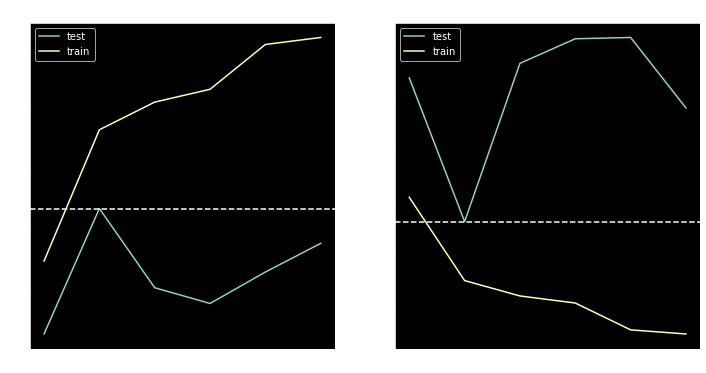

In [ ]:
from matplotlib import style
style.use('dark_background')
%matplotlib inline
def show_results(hists):
    for i,hist in enumerate(hists):
        plt.figure(figsize=(12,6))
        plt.subplot(len(hists),2,1)
        acc = hist.history['accuracy']
        test_acc = hist.history['val_accuracy']
        loss=hist.history['loss']
        test_loss=hist.history['val_loss']
        epochs=range(len(acc))
        plt.plot(epochs,test_acc,label='test')
        plt.plot(epochs,acc,label='train')
        plt.axhline(y=max(test_acc), linestyle='--')
        plt.legend()
        plt.title('Accuracy_{}'.format(i))
        plt.subplot(len(hists),2,2)
        plt.plot(epochs,test_loss,label='test')
        plt.plot(epochs,loss,label='train')
        plt.axhline(y=min(test_loss),linestyle='--')
        plt.legend()
        plt.title('Loss_{}'.format(i))
show_results([hist])

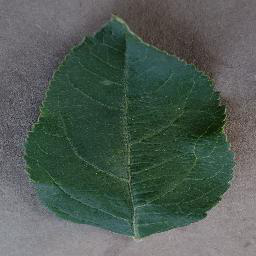

In [ ]:
from keras.preprocessing import image
new_image='/home/varun/Desktop/0a553fc0-fc2c-4598-baba-3bc10191447c___RS_HL 5969.JPG'
user_imgae=image.load_img(new_image,target_size=image_shape)
user_imgae

In [ ]:
user_image_array=image.img_to_array(user_imgae)

In [ ]:
user_image_array=np.expand_dims(user_image_array,axis=0)

In [ ]:
user_image_array.shape

(1, 256, 256, 3)

In [ ]:
result=model.predict(user_image_array)

In [ ]:
result.shape

(1, 38)

In [ ]:
result.astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

So, According to the result array the image plant leaf has TomatoYellowCurlVirus2 disease.